## IMPORTING LIBRARIES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATASET

IMPORTING THE DATASET AND CREATING DATAFRAME

In [16]:
data =sns.load_dataset('iris')
df = pd.DataFrame(data)
print(f'Iris dataset:\n {df.head(10)}')

Iris dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


## DATAFRAME INFORMATION

DATAFRAME BASIC INFORMATIION

In [17]:
print("\nDataframe Basic Information:\n")
print(df.info())
print(f'Dataframe Shape:\n {df.shape}')


Dataframe Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Dataframe Shape:
 (150, 5)


DATAFRAME STATISTICAL INFO

In [18]:
print("\nDataframe Statistical Information:")
print(df.describe())


Dataframe Statistical Information:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


CHECKING FOR NULL VALUES

In [19]:
df_null = df.isnull().sum()
print(f' Null values count:\n {df_null}')

 Null values count:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


MEAN AND MEDIAN ANALYSIS

In [20]:
mean_median = df.groupby('species').agg(['mean', 'median'])
print(f'\n Mean and Median values by species:\n {mean_median}')


 Mean and Median values by species:
            sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.246    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0  


## DATA VISUALIZATION

SPECIES COUNT (COUNT PLOT)

Species counts:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


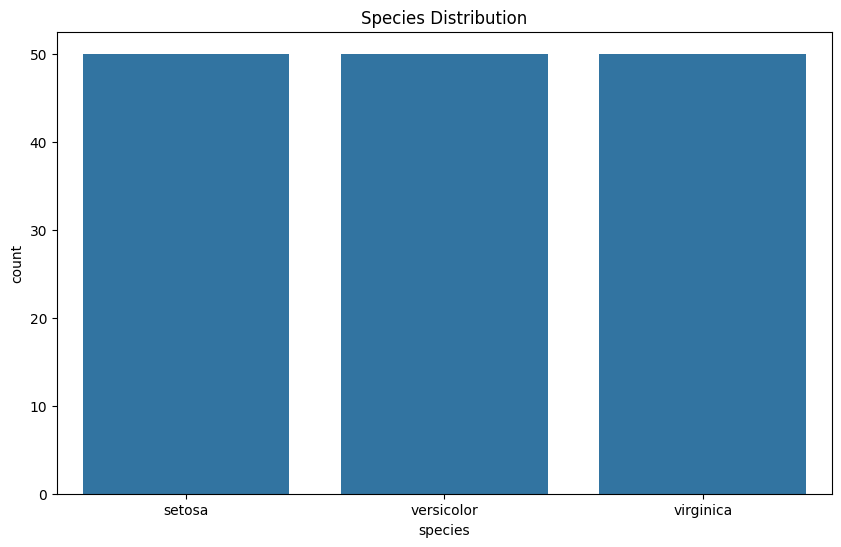

In [21]:
species_counts = df['species'].value_counts()
print(f'Species counts:\n{species_counts}')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species')
plt.title('Species Distribution')
plt.show()


SEPAL LENGTH VS SEPAL WIDTH (SCATTER PLOT)


 Average Sepal Length and Width by Species:
            sepal_length sepal_width
                   mean        mean
species                            
setosa            5.006       3.428
versicolor        5.936       2.770
virginica         6.588       2.974


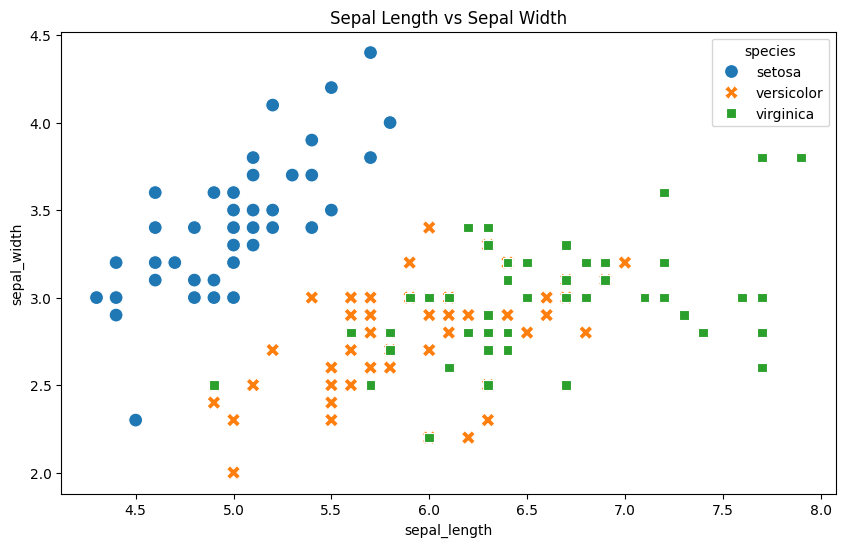

In [22]:
sepal_group = df.groupby('species')[['sepal_length', 'sepal_width']].agg(['mean'])
print(f'\n Average Sepal Length and Width by Species:\n {sepal_group}')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title('Sepal Length vs Sepal Width')
plt.show()


PETAL LENGTH VS PETAL WIDTH (SCATTER PLOT)

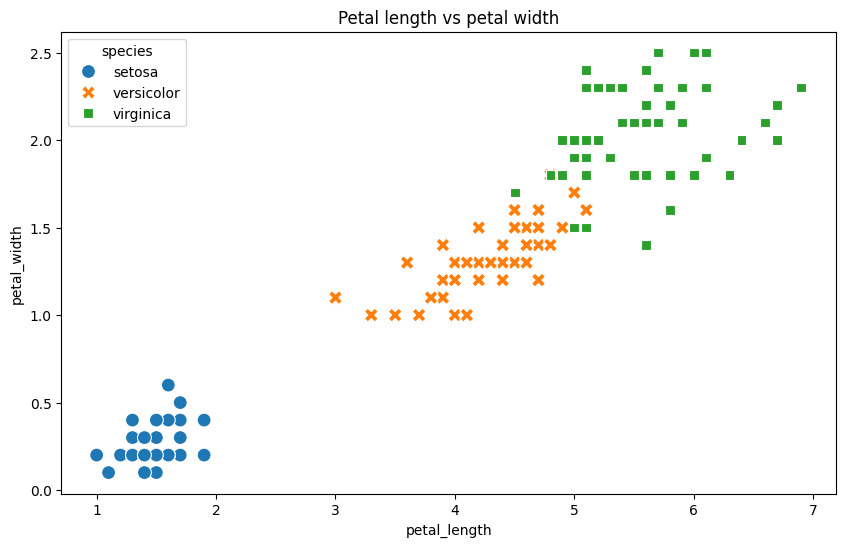

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species', s=100)
plt.title('Petal length vs petal width')
plt.show()

BOX PLOT

<Figure size 1000x600 with 0 Axes>

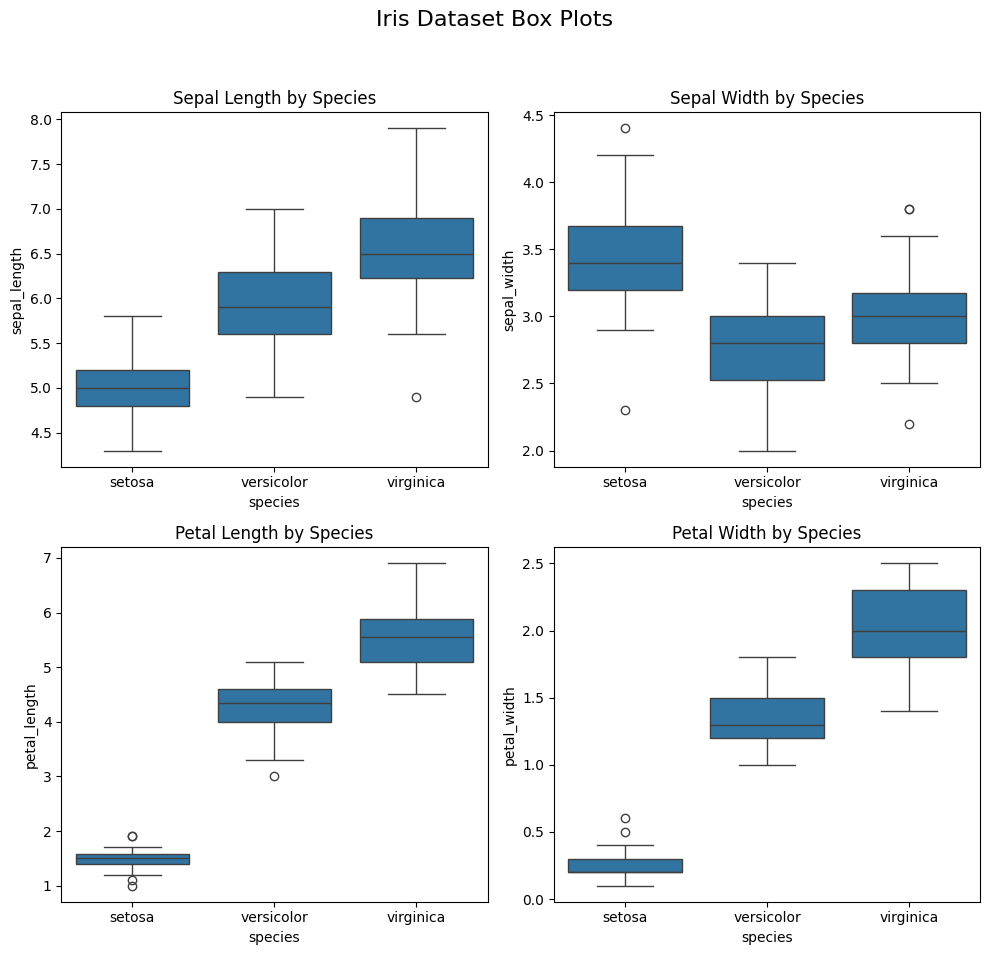

In [24]:
plt.figure(figsize=(10, 6))
fig,axes = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Iris Dataset Box Plots', fontsize=16)
sns.boxplot(data=df, x='species', y='sepal_length', ax=axes[0,0])
axes[0,0].set_title('Sepal Length by Species')
sns.boxplot(data=df, x='species', y='sepal_width', ax=axes[0,1])
axes[0,1].set_title('Sepal Width by Species')
sns.boxplot(data=df, x='species', y='petal_length', ax=axes[1,0])
axes[1,0].set_title('Petal Length by Species')
sns.boxplot(data=df, x='species', y='petal_width', ax=axes[1,1])
axes[1,1].set_title('Petal Width by Species')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## MACHINE LEARNING MODEL

Model Accuracy:
 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Clasification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
\ 



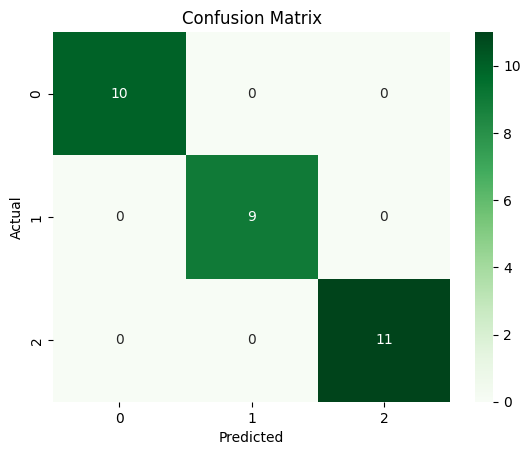

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x=df.drop('species', axis=1)
y=df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model =  LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy:\n {accuracy*100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}\n')

class_report = classification_report(y_test, y_pred)
print(f'Clasification Report:\n{class_report}\ \n')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SPECIES PREDICTION

In [26]:
sample_data = pd.DataFrame({
    'sepal_length': [5.9],
    'sepal_width': [3.0],
    'petal_length': [3.5],
    'petal_width': [1.1]
})
predict = model.predict(sample_data)
print(f'Prediction for sample data {sample_data.values.tolist()} : {predict[0]}')

Prediction for sample data [[5.9, 3.0, 3.5, 1.1]] : versicolor
